In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 75
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso

In [2]:
data = pd.read_csv('data/tracks_no_duplicate.csv', encoding='utf-8', index_col=False)

In [16]:
data.iloc[np.array([int(d.split('-')[0]) for d in data['release_date']]) == 2020, :].describe()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,duration_ms,key,loadness,mode,tempo,valence,available_market,explicit,idx
count,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1.343000e+03,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000
mean,33.139241,0.355074,0.558883,0.600383,0.220587,0.207630,0.084916,2.162297e+05,5.309010,-9.580004,0.609084,121.889551,0.453123,75.322413,0.109456,5344.784066
std,23.441924,0.372282,0.181442,0.282272,0.353487,0.185996,0.094462,8.942482e+04,3.592794,6.679120,0.488137,28.592744,0.263791,12.849507,0.312327,3198.036101
min,0.000000,0.000002,0.064500,0.006400,0.000000,0.018900,0.023200,3.106000e+04,0.000000,-37.850000,0.000000,44.695000,0.029900,1.000000,0.000000,17.000000
25%,9.500000,0.015900,0.435000,0.402000,0.000000,0.099100,0.038400,1.689725e+05,2.000000,-11.183500,0.000000,98.023000,0.225500,78.000000,0.000000,2581.500000
50%,36.000000,0.186000,0.571000,0.662000,0.000325,0.127000,0.049500,2.059330e+05,6.000000,-7.301000,1.000000,123.977000,0.445000,79.000000,0.000000,4953.000000
75%,53.000000,0.732000,0.695000,0.835500,0.422000,0.261000,0.085150,2.479020e+05,8.000000,-5.182500,1.000000,139.991500,0.662000,79.000000,0.000000,8028.000000
max,90.000000,0.996000,0.951000,0.998000,0.981000,0.979000,0.958000,1.190018e+06,11.000000,0.456000,1.000000,205.990000,0.977000,79.000000,1.000000,11196.000000


In [20]:
data.iloc[np.array([int(d.split('-')[0]) for d in data['release_date']]) == 2020, :]

,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,liveness,...,duration_ms,key,loadness,mode,tempo,valence,available_market,release_date,explicit,idx
17,2W9RK9VSTsJfJD0wwSkVyz,Wait,acoustic,https://open.spotify.com/track/2W9RK9VSTsJfJD0...,49.0,0.366000,0.346,0.5600,0.000016,0.2340,...,250909.0,2.0,-7.004,1.0,175.870,0.2090,79.0,2020-04-24,0.0,17
27,1zAsxB5uQo9s6PtUfBbWiV,Build It Up,acoustic,https://open.spotify.com/track/1zAsxB5uQo9s6Pt...,45.0,0.822000,0.322,0.2500,0.006960,0.0971,...,229802.0,0.0,-11.255,1.0,82.830,0.0938,79.0,2020-04-17,0.0,27
32,0dJDvqSaf1kQEbUXbgsagt,Asking for a Friend,acoustic,https://open.spotify.com/track/0dJDvqSaf1kQEbU...,37.0,0.729000,0.645,0.4670,0.000002,0.0756,...,235866.0,0.0,-9.449,1.0,126.914,0.2940,79.0,2020-04-03,0.0,32
35,4tqsFRjUHZ89bMEOAk3lUl,Miss You,acoustic,https://open.spotify.com/track/4tqsFRjUHZ89bME...,49.0,0.178000,0.592,0.6860,0.000000,0.1110,...,197546.0,9.0,-6.904,1.0,101.015,0.3970,78.0,2020-01-17,0.0,35
78,0swFW9sHhCVS892gh8ec2L,Love Anyway,acoustic,https://open.spotify.com/track/0swFW9sHhCVS892...,58.0,0.922000,0.675,0.0841,0.000009,0.1100,...,183456.0,3.0,-17.387,1.0,114.064,0.2120,79.0,2020-04-14,0.0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10936,22N66Nd37pZS5IwpJYZFko,DAY OF VICTORY,world-music,https://open.spotify.com/track/22N66Nd37pZS5Iw...,47.0,0.000186,0.570,0.8750,0.000000,0.9570,...,232306.0,10.0,-5.192,1.0,135.012,0.5890,79.0,2020-03-27,0.0,11173
10937,4CncE2vBI4cJnpMZvD5MBT,Over and Over,world-music,https://open.spotify.com/track/4CncE2vBI4cJnpM...,36.0,0.225000,0.390,0.4780,0.000000,0.7010,...,415413.0,0.0,-7.096,1.0,148.075,0.1240,79.0,2020-03-13,0.0,11174
10951,4tfpo5whNasRR4vLTX5sZD,Hope Returns,world-music,https://open.spotify.com/track/4tfpo5whNasRR4v...,38.0,0.006670,0.575,0.7540,0.000000,0.1020,...,233813.0,0.0,-5.703,1.0,116.958,0.2150,79.0,2020-02-14,0.0,11188
10955,3dnmjY6vlwJTom08chkPoA,Not Today,world-music,https://open.spotify.com/track/3dnmjY6vlwJTom0...,36.0,0.015900,0.560,0.5820,0.000000,0.0533,...,181600.0,0.0,-6.438,1.0,85.017,0.3370,79.0,2020-02-14,0.0,11192


(array([ 450.,  503.,  753., 1722., 2185., 2404., 1457.,  672.,  134.,
          12.]),
 array([ 0. ,  9.4, 18.8, 28.2, 37.6, 47. , 56.4, 65.8, 75.2, 84.6, 94. ]),
 <a list of 10 Patch objects>)

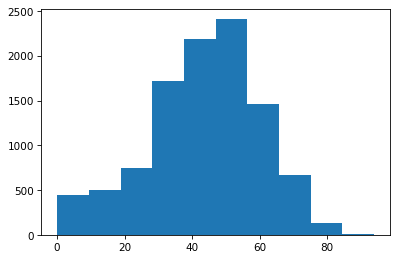

In [45]:
plt.hist(data.iloc[np.array([d < '2020-05' for d in data['release_date']]), 4])

In [47]:
sum(np.array([d >= '2020-05' for d in data['release_date']]))

671

(array([303., 105.,  68.,  47.,  49.,  36.,  37.,  15.,   6.,   5.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <a list of 10 Patch objects>)

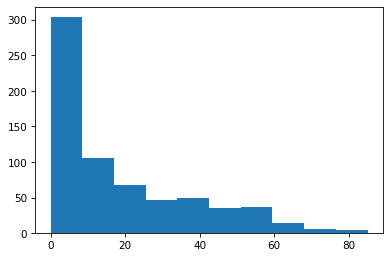

In [75]:
plt.hist(data.iloc[np.array([d >= '2020-05' for d in data['release_date']]), 4])